In [1]:
laptop = True

if laptop:
    rootF = 'C:/Users/goethas/'
else:
    rootF = '/home/sarah/'

In [2]:
import os
import sys
from matplotlib.pyplot import *
from numpy import *
from tqdm.auto import tqdm
import itertools
import csv
import h5py
import matplotlib.gridspec as gds
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.patches as pcs
import pickle
import pandas as pd

# Import diverse functions
from shared.functions import fit_gaussian, get_ellipse_parameters, plot_dendrogram
from shared.save_load import *

sys.path.append(rootF + '/Documents/GitHub/Stimuli-Generation/Checkerboard/')
from checkerboard import Checkerboard

# For clustering
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Get Euler stim profile
def get_euler():
    if laptop:
        vec_path = 'E:/MEA data/exp19/STIMS/Euler/'
    else:
        vec_path = '/mnt/ad978934-bc32-4a32-abbf-287b415f9e41/MEA data/exp19/STIMS/Euler/'
        
    vec_path = vec_path + r"euler.vec"
    euler_vec = np.genfromtxt(vec_path)

    return euler_vec

In [4]:
exp = 20221214

# Load data

In [5]:
data_path = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

good_clusters = list(cell_data.keys())

print (len(good_clusters), 'AP, A and B clusters')
print (good_clusters)

262 AP, A and B clusters
['2', '4', '6', '17', '18', '21', '29', '30', '31', '39', '40', '47', '48', '52', '54', '56', '60', '64', '65', '66', '67', '68', '72', '80', '84', '87', '101', '103', '106', '110', '112', '115', '116', '119', '123', '129', '135', '137', '139', '140', '152', '157', '158', '161', '162', '164', '166', '168', '170', '180', '183', '184', '190', '193', '197', '201', '203', '205', '213', '217', '221', '226', '231', '236', '237', '242', '244', '246', '255', '259', '260', '263', '265', '270', '271', '272', '275', '279', '280', '282', '284', '287', '289', '290', '292', '299', '305', '307', '312', '315', '316', '318', '319', '323', '326', '332', '343', '346', '347', '354', '356', '358', '360', '361', '362', '368', '379', '382', '385', '398', '400', '402', '404', '416', '417', '418', '421', '427', '431', '434', '439', '450', '465', '483', '489', '496', '504', '512', '519', '523', '545', '553', '557', '565', '575', '583', '591', '598', '602', '608', '616', '630', '634', '6

### Select the cells that have a spatial STA

In [7]:
if laptop:
    results_path = 'C:/Users/goethas/Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'
else:
    results_path = '/home/sarah/Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'
    
cluster_selection = pd.read_excel(results_path + str(exp) + '_cluster_selection.xlsx', header=0)

cluster_names = cluster_selection['Cluster']
selection = cluster_selection['Selected']
defined_STA = cluster_selection['Comments Sarah']
STA_start = cluster_selection['Spatial STA']
STA_end = cluster_selection['Sp STA END']

skip_cells = [] # very low firing rate during chirp

# Select "YES" cells with a spatial STA
selected_cells = []
which_STA = []

for i in range(len(cluster_names)):
    if cluster_names[i] not in skip_cells and selection[i] == 'YES' and defined_STA[i] != 'no STA':
        if STA_start[i] == 0:
            print (cluster_names[i], 'end')
            which_STA.append('end')
            selected_cells.append(cluster_names[i])
        else:
            print (cluster_names[i], 'start')
            which_STA.append('start')
            selected_cells.append(cluster_names[i])
            
        
print (len(selected_cells), 'good cells!')

6 start
21 start
29 start
40 start
60 start
65 start
106 start
112 start
115 start
119 start
129 start
140 start
161 start
162 end
170 start
190 start
205 end
217 end
236 start
244 start
246 end
255 start
275 start
290 end
307 start
312 end
332 start
347 start
385 start
398 end
400 start
417 start
418 end
421 start
483 start
489 start
496 end
512 start
519 start
583 start
639 start
684 start
731 start
763 start
785 start
801 start
811 start
831 start
861 end
873 start
882 start
901 start
912 start
913 end
931 end
945 start
953 start
957 start
995 start
1005 end
1025 end
1033 start
1035 start
1070 end
1082 start
1092 start
1106 start
1108 start
1112 start
1114 start
1134 end
1172 start
1173 start
1188 start
1241 start
1250 start
1259 end
1264 start
1265 end
1267 start
1274 start
81 good cells!


# Get ellipses

In [8]:
for cell_index in range(len(selected_cells)):
    cell_id = str(selected_cells[cell_index])
    
    ### Spatial STA
    if which_STA[cell_index] == 'start':
        spatial = cell_data[cell_id]['spatial_sta']
    elif which_STA[cell_index] == 'end':
        spatial = cell_data[cell_id]['spatial_sta2']
        
    # Gaussian fit
    x_fit, y_fit, fitted_spatial_sta , parameters = fit_gaussian(spatial)

    # Get ellipse parameters
    factor_sigma = 2 # TODO: correct?
    x0, y0, width, height, angle = get_ellipse_parameters(parameters, factor=factor_sigma)
    
    cell_data[cell_id]["ellipseSigmaXY"] = width, height

##### Select the best cells
Those that have a nice response to the chirp and a weel defined STA

# Cell typing

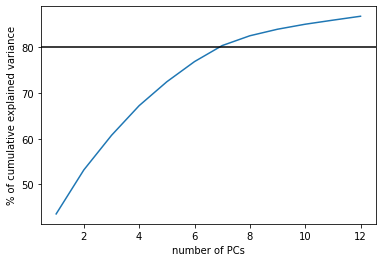

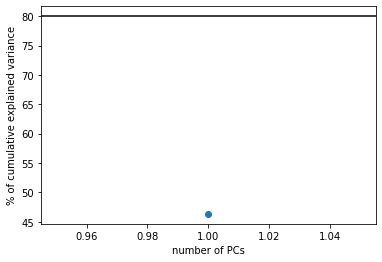

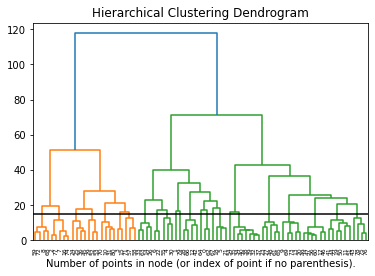

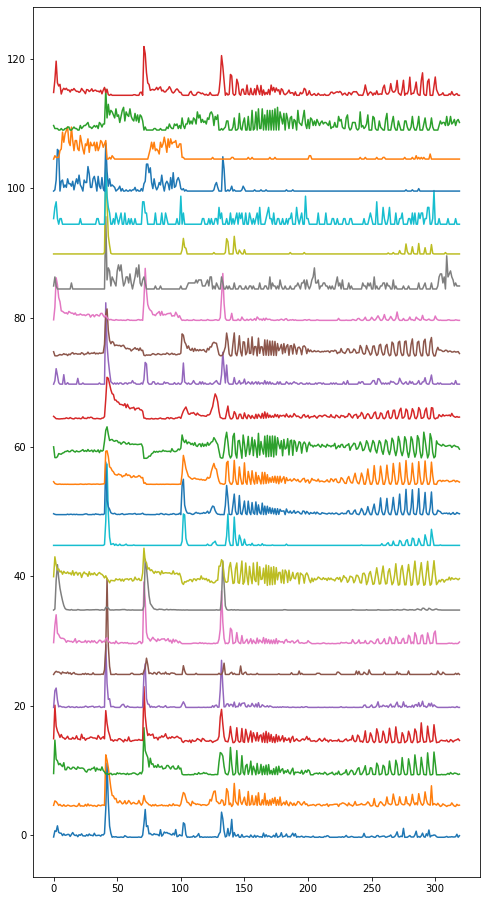

Number of clusters:  24
cluster size : 3


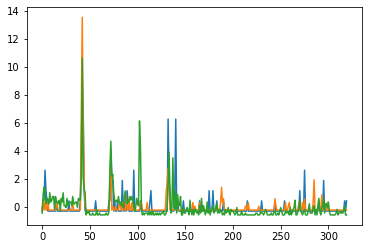

cluster size : 4


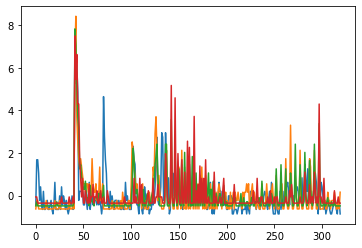

cluster size : 3


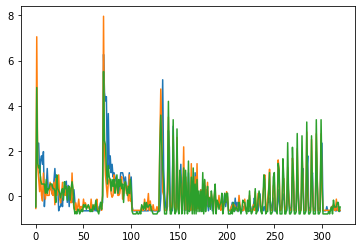

cluster size : 3


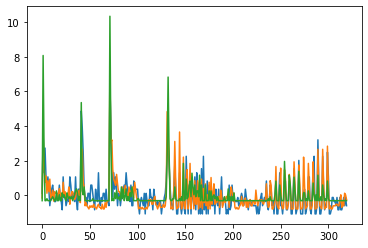

cluster size : 4


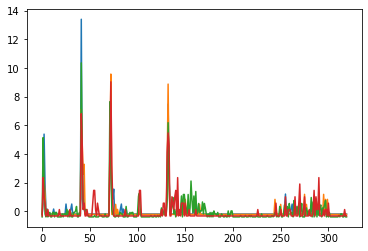

cluster size : 4


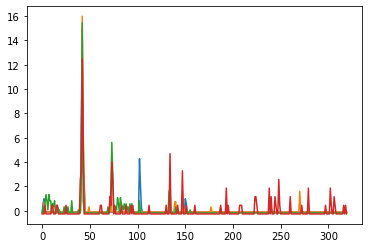

cluster size : 4


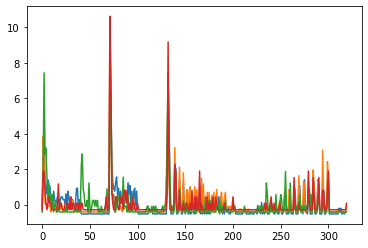

cluster size : 5


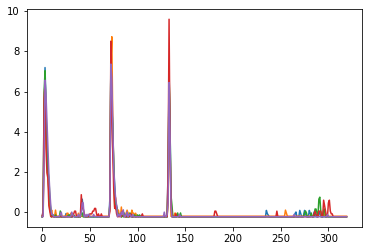

cluster size : 4


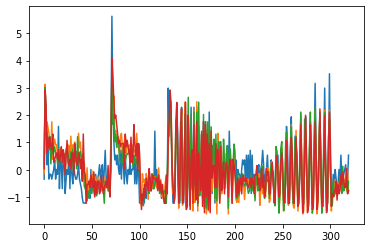

cluster size : 2


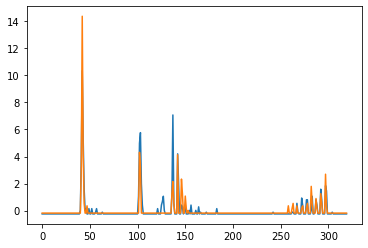

cluster size : 5


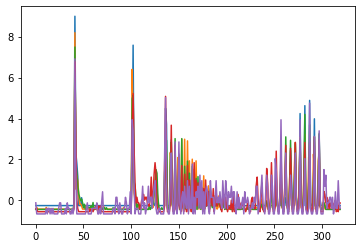

cluster size : 6


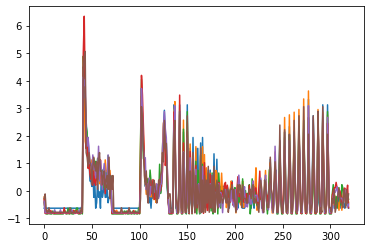

cluster size : 7


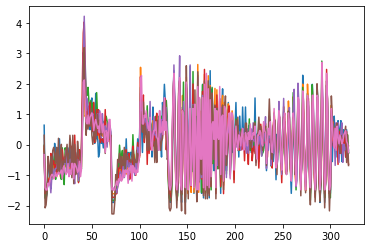

cluster size : 5


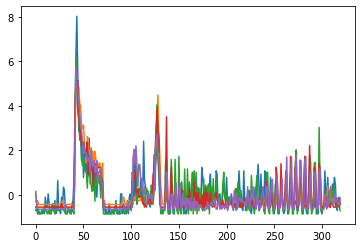

cluster size : 2


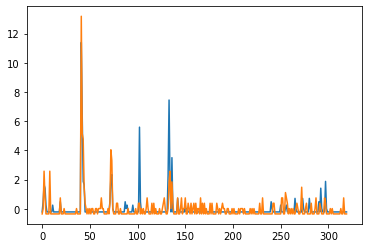

cluster size : 6


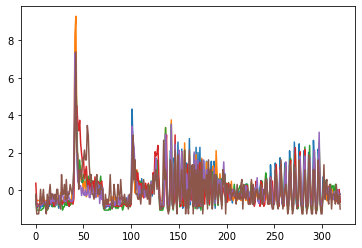

cluster size : 4


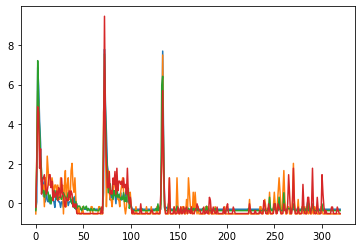

cluster size : 1


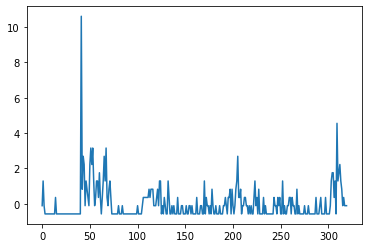

cluster size : 3


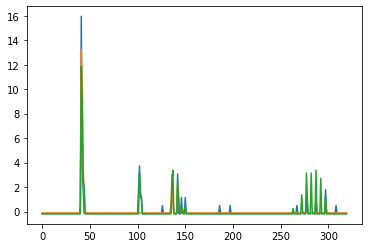

cluster size : 1


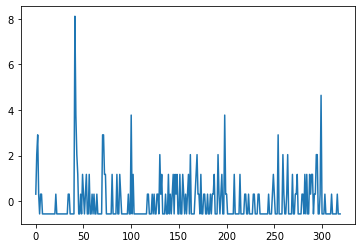

cluster size : 1


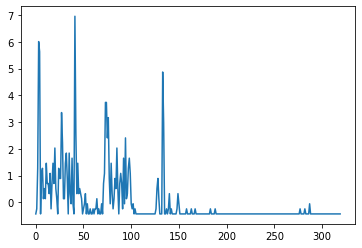

cluster size : 1


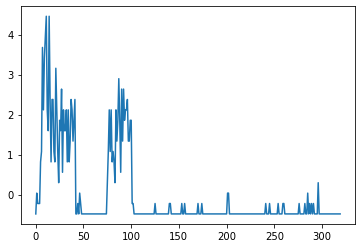

cluster size : 1


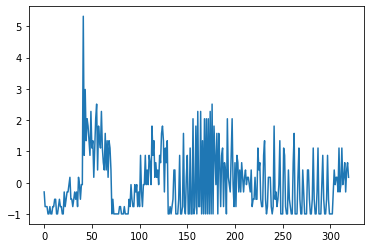

cluster size : 2


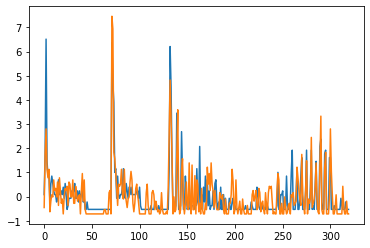

In [15]:
import scipy as sc
from sklearn.decomposition import SparsePCA
sparse=False

# change dist_thres to adapt the cut of the dendrogram and select the number of clusters
#####################################################################
dist_thres = 15 #20#32 # exp20221214: 13, 14 and 15 give the same results
#####################################################################

n_cells = len(selected_cells)

#-----------------------------------
#-----------------------------------
# Get Euler PCA
n_rep = 20 # nb of repeats
nt = 32 # total length
dt = 0.1 # bin size
if exp==22: 
    nt=40
    dt=0.125
time_bins = np.arange(0,nt+dt,dt)

spikes = np.zeros((n_cells, int(nt/dt), n_rep))
for cell_index in range(len(selected_cells)):
    cell_id = str(selected_cells[cell_index])
    spike_cell = cell_data[cell_id]["spike_trains"]
    for rep in range(n_rep):
        temp=np.histogram(spike_cell[rep], bins=time_bins)
        spikes[cell_index,:,rep] = temp[0]

#-------------------------
# Pre process the PSTH
psth = np.mean(spikes, 2)
psth_z = sc.stats.zscore(psth, 1)

# Select number of PCs to keep (here 13 explain ~80% of the variance)
#####################################################################
n_components_psth = 12  #13#16
#####################################################################
if sparse:
   pca_transformer = SparsePCA(n_components_psth, random_state=0).fit(psth_z)
else:
   pca_transformer = PCA(n_components_psth).fit(psth_z)
psth_pca = pca_transformer.transform(psth_z)
# -----------------------------------
# -----------------------------------
# Get checkerboard STA PCA
STA_time_course = np.zeros((n_cells, 40))  # 40 data points for these STAs
for cell_index in range(len(selected_cells)):
    cell_id = str(selected_cells[cell_index])
    if which_STA[cell_index] == 'start':
        TempSTA_cell = cell_data[cell_id]["temporal_sta"]
    elif which_STA[cell_index] == 'end':
        TempSTA_cell = cell_data[cell_id]["temporal_sta2"]
    STA_time_course[cell_index] = TempSTA_cell
    
#---------------------------
# Pre process the STA
sta_tc = sc.stats.zscore(STA_time_course[:,:], 1)
#####################################################################
n_components_sta_tc = 1
#####################################################################
if n_components_sta_tc>0:
    pca_transformer2 = PCA(n_components_sta_tc).fit(sta_tc)
    sta_tc_pca = pca_transformer2.transform(sta_tc)
#-----------------------------------
#-----------------------------------
if not sparse:
    plt.plot(np.arange(n_components_psth)+1, np.cumsum(pca_transformer.explained_variance_ratio_)*100)
    plt.axhline(y=80, color='k')
    plt.xlabel('number of PCs')
    plt.ylabel('% of cumulative explained variance')
    plt.show()

    if n_components_sta_tc>0:
        plt.plot(np.arange(n_components_sta_tc)+1, np.cumsum(pca_transformer2.explained_variance_ratio_)*100,'o-')
        plt.axhline(y=80, color='k')
        plt.xlabel('number of PCs')
        plt.ylabel('% of cumulative explained variance')
        plt.show()
#-----------------------------------
#-----------------------------------
cluster_dataset = np.zeros((n_cells, n_components_psth+n_components_sta_tc+1))
cluster_dataset[:,:n_components_psth] = psth_pca
if n_components_sta_tc>0:
    cluster_dataset[:,n_components_psth:n_components_psth+n_components_sta_tc] = sta_tc_pca

ell_size=np.zeros(len(selected_cells))
for cell_index in range(len(selected_cells)):
    cell_id = str(selected_cells[cell_index])
    width,height = cell_data[cell_id]["ellipseSigmaXY"]
#     print (width, height)
    ell_size[cell_index] = np.abs(np.pi*width*height)
    
ell_size_temp = -np.ones(n_cells)
temp = ell_size[:]-ell_size[:].min()
ell_size_temp[:] = temp/temp.max()
cluster_dataset[:,-1] = ell_size_temp
#-----------------------------------
#-----------------------------------

# perform agglomerative clustering
model = AgglomerativeClustering(distance_threshold=dist_thres, n_clusters=None)
#model = model.fit(psth_pca)
model = model.fit(cluster_dataset)

# plot the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=0)
plt.axhline(dist_thres, color='k')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# plot the cluster centroids
n_clusts = len(np.unique(model.labels_))
plt.figure(figsize=(8,16))
for iclust in range(n_clusts):
    idx_cluster = np.where(model.labels_==iclust)[0]
    plt.plot(np.mean(psth_z[idx_cluster,:], 0) + iclust * 5)
plt.show() 
    
print('Number of clusters: ',len(np.unique(model.labels_)))

# plot the psths of all cells in one cluster
for icluster in range(len(np.unique(model.labels_))):
    # icluster = 0
    idx_cluster = np.where(model.labels_==icluster)[0]
    print(f'cluster size : {len(idx_cluster)}')
    plt.figure()
    plt.plot(psth_z[idx_cluster,:].transpose())
    plt.show()

In [16]:
# Save the cluster of each cell
for cell_index in range(len(selected_cells)):
    cell_nb = str(selected_cells[cell_index])
    cell_data[cell_nb]["type"] = model.labels_[cell_index]

# Save clustering results

In [17]:
# the dictionary 'call_data' with cluster type in addition
fsave = data_path + 'cells_characterization_data_with_cluster_type_' + str(exp)
save_obj(cell_data,fsave)

# the model
fsave = data_path + str(exp) + '_clustermodel'
save_obj([model,psth_z],fsave)

# selected cells
fsave = data_path + str(exp) + '_selected_cells_clustering'
save_obj(selected_cells,fsave)

# Create a summary figure for each cluster type

In [18]:
from matplotlib import gridspec

for icluster in range(len(np.unique(model.labels_)))[0:]:
    idx_cluster = np.where(model.labels_==icluster)[0]
    print(len(idx_cluster))

    gs = gridspec.GridSpec(len(idx_cluster)+2,6)
    
    if len(idx_cluster)<7:
        yspan = 2
    else:
        yspan=-2
        
    fig = figure(figsize=(14,(len(idx_cluster)+yspan)*1.75))
    plt.suptitle("Cell group {}\n {} cells".format(icluster, len(idx_cluster)))

    #-------------------------------
    # Loop cells in cluster
    line = 2
    STAs = np.zeros(40)
    STAcount = 0
    waves = np.zeros(101)
    wavecount = 0
    for index in sorted(idx_cluster):
        cell_nb = str(selected_cells[index])
        print (cell_nb, selected_cells[index])
        
        #-----------------
        # Plot temp STA
        ax= subplot(gs[line,1])
        
#         ax.set_ylim([-4,4])
        ax.set_ylim([-2,2])
        ax.axis("off")
#         ax.set_aspect(0.075)
        if which_STA[index] == 'start':
            ax.step(np.linspace(-40/30,0,40),cell_data[cell_nb]["temporal_sta"],'k',lw=3)
        elif which_STA[index] == 'end':
            ax.step(np.linspace(-40/30,0,40),cell_data[cell_nb]["temporal_sta2"],'k',lw=3)
        polarity = cell_data[cell_nb]["polarity"]
        ax.set_title('Cluster ' + str(cell_nb) + '  Polarity ' + polarity)
        ax.axhline(0,color='k',lw=0.5)
        
        if which_STA[index] == 'start':
            STAs += cell_data[cell_nb]["temporal_sta"]
        elif which_STA[index] == 'end':
            STAs += cell_data[cell_nb]["temporal_sta2"]
            
        STAcount += 1
        
        #-----------------
        # Plot temp STA avg
        ax= subplot(gs[0,1])
        
        ax.set_title('Temp STA')
        ax.set_ylim([-1,1])
        if which_STA[index] == 'start':
            ax.plot(np.linspace(-40/30,0,40),cell_data[cell_nb]["temporal_sta"],lw=0.5)
        elif which_STA[index] == 'end':
            ax.plot(np.linspace(-40/30,0,40),cell_data[cell_nb]["temporal_sta2"],lw=0.5)
        ax.axhline(0,color='k',lw=0.5)
        ax.set_xlabel('Time(s)')
        
        #-----------------
        # plot Spatial STA
        ax= subplot(gs[line,0])
        
        if which_STA[index] == 'start':
            ax.imshow(cell_data[cell_nb]["spatial_sta"], cmap='gray', interpolation='gaussian')
        elif which_STA[index] == 'end':
            ax.imshow(cell_data[cell_nb]["spatial_sta2"], cmap='gray', interpolation='gaussian')
        ax.set_xlim(16,44)
        ax.set_ylim(44,16)
        ax.set_aspect('equal')
        #ax.set_title('Cluster' + str(cell_nb))
        ax.set_xticks([])
        ax.set_yticks([])
       
        #----------------
        #plot waveform
        ax= subplot(gs[line,2])
        
        wave = cell_data[cell_nb]["templates"]/abs(np.min(cell_data[cell_nb]["templates"]))
        ax.plot(wave,'r')
        ax.axis("off")
        ax.set_ylim([-1.25,1.25])
        waves+=wave
        wavecount+=1
        
        ax= subplot(gs[0,2])
        ax.plot(wave,lw=0.5)
        ax.axis("off")
        ax.set_ylim([-1.25,1.25])
        #-----------------
        # plot Euler
        ax= subplot(gs[line,3:])
        
#         cell_index = selected_cells.index(cell_nb)
        ax.plot(np.linspace(0,32,800),cell_data[cell_nb]["psth"])
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticks([])
        plt.locator_params(axis="y", nbins=3)
        
        #-----------------
        # plot Ellipse
        if which_STA[index] == 'start':
            x_fit, y_fit, fitted_spatial_sta , parameters = fit_gaussian(cell_data[cell_nb]["spatial_sta"])
        elif which_STA[index] == 'end':
            x_fit, y_fit, fitted_spatial_sta , parameters = fit_gaussian(cell_data[cell_nb]["spatial_sta2"])
        
        x0, y0, width, height, angle = get_ellipse_parameters(parameters, factor=1)
        xy = (x0, y0)

        ax= subplot(gs[line,0])
        ellipse = pcs.Ellipse(xy, width, height, angle=angle, fill=False, color='r',lw=1)
        ax.add_patch(ellipse)
        
        ax= subplot(gs[0,0])
        ellipse = pcs.Ellipse(xy, width, height, angle=angle, fill=False, color='k',lw=1)
        ax.add_patch(ellipse)
        
        line+=1
    #-----------------
    # avg STA
    STAs = STAs/STAcount
    ax= subplot(gs[0,1])
    ax.plot(np.linspace(-40/30,0,40), STAs,'k',lw=2)
#     ax.set_ylim([-2,2])
#     ax.set_aspect(0.075)
    ax.axis("off")
    
    #-----------------
    # avg wave
    waves=waves/wavecount
    ax= subplot(gs[0,2])
    ax.set_title('Waveform')
    
    ax.plot(waves,'r',lw=2)
    ax.set_ylim([-1.25,1.25])
    #ax.set_aspect(0.075)
    ax.axis("off")
    
    #-----------------
    # size ellipses
    ax= subplot(gs[0,0])
    
    ax.set_title('Ellipses')
    ax.set_xlim(16,44)
    ax.set_ylim(44,16)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
        
    #-----------------
    # mean psth
    ax= subplot(gs[0,3:])
    ax.set_title('Euler psth')
    
    ax.plot(np.linspace(0,32,320),np.mean(psth_z[idx_cluster,:], 0),'g')
    ax.axis("off")

    #-----------------
    # plot euler stim
    euler_vec= get_euler()
    ax= subplot(gs[1,3:])
    
    ax.plot(np.linspace(0,32,1600),euler_vec[150:1750,1], color='k')
    ax.set_yticks([])
    ax.set_ylim([-100,350])
    ax.set_xlabel('Time(s)')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax= subplot(gs[1,2])
    ax.text(0.5,0.5 ,"Chirp stimulus profile")
    ax.axis("off")
    
    PDF_folder = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/RGC typing/clustering/'
    fsave = PDF_folder +'exp'+str(exp)+'_clustype' +str(icluster) 
    
    fig.savefig(fsave+'.png',format='png',dpi=250)
    close(fig)  

3
60 60
400 400
945 945
4
763 763
1250 1250
1259 1259
1265 1265
3
398 398
912 912
913 913
3
957 957
995 995
1172 1172
4
161 161
385 385
731 731
1106 1106
4
170 170
332 332
421 421
1070 1070
4
129 129
417 417
1134 1134
1274 1274
5
29 29
112 112
205 205
1241 1241
1264 1264
4
307 307
312 312
496 496
801 801
2
106 106
275 275
5
119 119
162 162
246 246
1114 1114
1188 1188
6
217 217
811 811
831 831
873 873
953 953
1025 1025
7
418 418
483 483
489 489
512 512
519 519
583 583
639 639
5
290 290
347 347
861 861
1033 1033
1092 1092
2
6 6
1035 1035
6
140 140
244 244
684 684
785 785
882 882
901 901
4
115 115
1005 1005
1112 1112
1173 1173
1
1108 1108
3
65 65
236 236
255 255
1
1082 1082
1
1267 1267
1
21 21
1
931 931
2
40 40
190 190


In [41]:
idx_cluster

array([ 8, 28, 32, 54], dtype=int64)

# Compare clusters response to blur

## Load data

In [100]:
exp = 20220407

from parameters_stimulation2 import *

if laptop:
    rootF = 'C:/Users/goethas/'
else:
    rootF = '/home/sarah/'

data_path = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

blur_data = load(data_path + str(exp) + '_selected_cells_spike_count_with_noise.npz')
    
spike_counts = blur_data['spike_count']
spike_counts_mean = blur_data['spike_count_mean']
spike_counts_std = blur_data['spike_count_std']
blur_clusters = blur_data['clusters']

Ncells = len(blur_clusters)

print (shape(spike_counts))
print (blur_clusters)

(53, 4, 2, 9, 4, 25)
[  10   33   34   39   52   89  105  109  114  150  161  172  188  197
  203  205  246  250  297  304  327  384  418  489  556  570  582  596
  602  610  612  653  706  734  798  816  853  855  935  947  985 1030
 1064 1066 1076 1116 1122 1139 1170 1178 1192 1196 1245]


## Plots

In [101]:
exp = 20220407

pup = 0

cols = ['C0','C1','C2','C3']

from matplotlib import gridspec

for icluster in range(len(np.unique(model.labels_)))[0:]:
    idx_cluster = np.where(model.labels_==icluster)[0]
    print(len(idx_cluster))

    gs = gridspec.GridSpec(len(idx_cluster)+2,10)
    
    if len(idx_cluster)<7:
        yspan = 2
    else:
        yspan=-2
        
    fig = figure(figsize=(20,(len(idx_cluster)+yspan)*2))
    plt.suptitle("Cell group {}\n {} cells".format(icluster, len(idx_cluster)))

    #-------------------------------
    # Loop cells in cluster
    line = 2
    STAs = np.zeros(40)
    STAcount = 0
    waves = np.zeros(101)
    wavecount = 0
    for index in sorted(idx_cluster):
        cell_nb = selected_cells[index]
        
        #### Clustering results
        
        #-----------------
        # Plot temp STA
        ax= subplot(gs[line,1])
        
        ax.set_ylim([-4,4])
        ax.axis("off")
        ax.set_aspect(0.075)
        ax.step(np.linspace(-40/30,0,40),cell_data[cell_nb]["temporal_sta"],'k',lw=3)
        polarity = cell_data[cell_nb]["polarity"]
        ax.set_title('Cluster ' + str(cell_nb) + '\nPolarity '+polarity)
        ax.axhline(0,color='k',lw=0.5)
        
        STAs += cell_data[cell_nb]["temporal_sta"]
        STAcount += 1
        
        #-----------------
        # Plot temp STA avg
        ax= subplot(gs[0,1])
        
        ax.set_title('Temp STA')
        ax.set_ylim([-1,1])
        ax.plot(np.linspace(-40/30,0,40),cell_data[cell_nb]["temporal_sta"],lw=0.5)
        ax.axhline(0,color='k',lw=0.5)
        ax.set_xlabel('Time(s)')
        #-----------------
        # plot Spatial STA
        ax= subplot(gs[line,0])
                
        ax.imshow(cell_data[cell_nb]["spatial_sta"], cmap='gray',interpolation='gaussian')
        ax.set_xlim(16,44)
        ax.set_ylim(44,16)
        ax.set_aspect('equal')
        #ax.set_title('Cluster' + str(cell_nb))
        ax.set_xticks([])
        ax.set_yticks([])
       
        #----------------
        #plot waveform
        ax= subplot(gs[line,2])
        
        wave = cell_data[cell_nb]["templates"]/abs(np.min(cell_data[cell_nb]["templates"]))
        ax.plot(wave,'r')
        ax.axis("off")
        ax.set_ylim([-1.25,1.25])
        waves+=wave
        wavecount+=1
        
        ax= subplot(gs[0,2])
        ax.plot(wave,lw=0.5)
        ax.axis("off")
        ax.set_ylim([-1.25,1.25])
        #-----------------
        # plot Euler
        ax= subplot(gs[line,3:6])
        
        cell_index=selected_cells.index(cell_nb)
        ax.plot(np.linspace(0,32,800),cell_data[cell_nb]["psth"])
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticks([])
        plt.locator_params(axis="y", nbins=3)
        
        #-----------------
        # plot Ellipse
        x_fit, y_fit, fitted_spatial_sta , parameters = fit_gaussian(cell_data[cell_nb]["spatial_sta"])
        
        x0, y0, width, height, angle = get_ellipse_parameters(parameters, factor=1)
        xy = (x0, y0)

        ax= subplot(gs[line,0])
        ellipse = pcs.Ellipse(xy, width, height, angle=angle, fill=False, color='r',lw=1)
        ax.add_patch(ellipse)
        
        ax= subplot(gs[0,0])
        ellipse = pcs.Ellipse(xy, width, height, angle=angle, fill=False, color='k',lw=1)
        ax.add_patch(ellipse)
        
        ##### Cells reponse to blur
        index_bl = where(blur_clusters == selected_cells[index])[0]
        print (selected_cells[index], blur_clusters[index_bl])
        if len(index_bl) > 0:
            index_bl = index_bl[0]
            max_act = nanmax(spike_counts_mean[index_bl])

            for src in range(Nsources):
                ax = fig.add_subplot(gs[line, src + 6])
                for iImg in range(Nimgs):
                    ax.plot(dFs, spike_counts_mean[index_bl, iImg, pup, :, src],'-', \
                            color=cols[iImg])
                    ax.spines['top'].set_visible(False)
                    ax.spines['right'].set_visible(False)
                    ax.set_ylim(0,1.5*max_act)
                    ax.set_xlim(0, 9)
                    ax.set_xticks(dFs[::2])
                    if line == 2:
                        ax.set_title('Ecc = {}°'.format(sourcesEcc[src]))
                        ax.set_xticklabels([])
                    if src == 0:
                        ax.set_ylabel('Spike cnt')
                    else:
                        ax.set_yticks([])
                    if line == len(idx_cluster)+1:
                        ax.set_xlabel('Defocus (D)')
                    else:
                        ax.set_xticks([])
                        
#                         ax.legend(frameon=False, fontsize = 8)
        
        line+=1
    #-----------------
    # avg STA
    STAs = STAs/STAcount
    ax= subplot(gs[0,1])
    ax.plot(np.linspace(-40/30,0,40),STAs,'k',lw=2)
    ax.set_ylim([-2,2])
    ax.set_aspect(0.075)
    ax.axis("off")
    
    #-----------------
    # avg wave
    waves=waves/wavecount
    ax= subplot(gs[0,2])
    ax.set_title('Waveform')
    
    ax.plot(waves,'r',lw=2)
    ax.set_ylim([-1.25,1.25])
    #ax.set_aspect(0.075)
    ax.axis("off")
    
    #-----------------
    # size ellipses
    ax= subplot(gs[0,0])
    
    ax.set_title('Ellipses')
    ax.set_xlim(16,44)
    ax.set_ylim(44,16)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
        
    #-----------------
    # mean psth
    ax= subplot(gs[0,3:6])
    ax.set_title('Euler psth')
    
    ax.plot(np.linspace(0,32,320),np.mean(psth_z[idx_cluster,:], 0),'g')
    ax.axis("off")

    #-----------------
    # plot euler stim
    euler_vec= get_euler()
    ax= subplot(gs[1,3:6])
    
    ax.plot(np.linspace(0,32,1600),euler_vec[150:1750,1], color='k')
    ax.set_yticks([])
    ax.set_ylim([-100,350])
    ax.set_xlabel('Time(s)')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax= subplot(gs[1,2])
    ax.text(0.5,0.5 ,"Chirp stimulus profile")
    ax.axis("off")
    
    PDF_folder = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/RGC typing/'
    fsave = PDF_folder +'exp'+str(exp)+'_clustype' + str(icluster) + '_with_blur'
    
    fig.savefig(fsave+'.png',format='png',dpi=250)
    close(fig)  


11
sigma_x 1.0334516085500072 pixel,
sigma_y 2.1791704752169414 pixel,
amplitude: -0.11368751560744128
34 [34]
sigma_x 1.136278712212258 pixel,
sigma_y 0.9383118345139538 pixel,
amplitude: -0.11619240667745458
39 [39]
sigma_x 1.0439609012173616 pixel,
sigma_y 0.8491497838931739 pixel,
amplitude: 0.07255174781978035
109 [109]
sigma_x 1.410139739215022 pixel,
sigma_y 1.9767790996726269 pixel,
amplitude: -0.08762705565002539
205 [205]
sigma_x 1.1231614458424686 pixel,
sigma_y 1.2716215756586595 pixel,
amplitude: -0.09999838937765865
706 [706]
sigma_x 1.1925023651005344 pixel,
sigma_y 1.5132028168142555 pixel,
amplitude: -0.06137341943547868
915 []
sigma_x 1.3011233440282823 pixel,
sigma_y 0.8860993221529397 pixel,
amplitude: -0.12181019320765311
935 [935]
sigma_x 1.2807895560284677 pixel,
sigma_y 0.937200098523758 pixel,
amplitude: -0.12030771669432962
985 [985]
sigma_x 0.9399110115039928 pixel,
sigma_y 1.7154051092469236 pixel,
amplitude: -0.09797377545759035
1030 [1030]
sigma_x 1.495667

/tmp/ipykernel_937297/1948028298.py:128: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0,1.5*max_act)
/tmp/ipykernel_937297/1948028298.py:128: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0,1.5*max_act)
/tmp/ipykernel_937297/1948028298.py:128: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0,1.5*max_act)
/tmp/ipykernel_937297/1948028298.py:128: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0,1.5*max_act)
/tmp/ipykernel_937297/1948028298.py:128: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0,1.5*max_act)
/tmp/ipykernel_937297/1948028298.py:128:

sigma_x 1.1857333058715778 pixel,
sigma_y 1.7125352992142133 pixel,
amplitude: 0.09111151945040517
798 [798]
sigma_x 1.3990169725899326 pixel,
sigma_y 1.3193659746174522 pixel,
amplitude: 0.13789731427949448
947 [947]
sigma_x 1.7515162020703994 pixel,
sigma_y 1.1406152020460576 pixel,
amplitude: 0.1435523953411457
1066 [1066]
4
sigma_x 2.4581568562405365 pixel,
sigma_y 1.7474215424071982 pixel,
amplitude: 0.10232309997691522
246 [246]
sigma_x 2.130165910526853 pixel,
sigma_y 1.4408081021772028 pixel,
amplitude: 0.19171818992727124
384 [384]
sigma_x 1.3249443239785719 pixel,
sigma_y 1.8609793231529355 pixel,
amplitude: 0.2014231799011426
418 [418]
sigma_x 2.1454017151073 pixel,
sigma_y 1.4726215055517562 pixel,
amplitude: 0.07379240940725956
734 [734]
2
sigma_x 1.0223735640605998 pixel,
sigma_y 2.1697671693792366 pixel,
amplitude: 0.045236085933174804
114 [114]
sigma_x 9.186436448759434 pixel,
sigma_y 0.2004803015463999 pixel,
amplitude: -0.9261288681373597
653 [653]
1
sigma_x 0.9497580